In [1]:
import pandas as pd
import numpy as np
import datetime

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import acquire as a
import prepare as p

# Exercise
### Do your work for this exercise in a notebook named `explore`. Use the techniques in the lesson to explore the `store` item demand dataset and the `opsd` dataset.

- For the `store` item demand data, you will need to choose a method of aggregating such that each observation is a unique date. 
- For both datasets you should choose a method of splitting your data and *only explore the ***training*** split*.

In [7]:
#sales = pd.read_csv('sales.csv')

In [8]:
#sales.drop(columns=sales.columns[0])

,item,sale_amount,sale_date,sale_id,store
0,1,13.00,"Tue, 01 Jan 2013 00:00:00 GMT",1,1
1,1,11.00,"Wed, 02 Jan 2013 00:00:00 GMT",2,1
2,1,14.00,"Thu, 03 Jan 2013 00:00:00 GMT",3,1
3,1,13.00,"Fri, 04 Jan 2013 00:00:00 GMT",4,1
4,1,10.00,"Sat, 05 Jan 2013 00:00:00 GMT",5,1
...,...,...,...,...,...
912995,50,63.00,"Wed, 27 Dec 2017 00:00:00 GMT",912996,10
912996,50,59.00,"Thu, 28 Dec 2017 00:00:00 GMT",912997,10
912997,50,74.00,"Fri, 29 Dec 2017 00:00:00 GMT",912998,10
912998,50,62.00,"Sat, 30 Dec 2017 00:00:00 GMT",912999,10


In [6]:
#sales.head()

,Unnamed: 0,item,sale_amount,sale_date,sale_id,store


In [2]:
df = a.merge_zach()

In [3]:
df.head(2).T

,0,1
item_brand,Riceland,Riceland
item_id,1,1
item_name,Riceland American Jazmine Rice,Riceland American Jazmine Rice
item_price,0.84,0.84
item_upc12,35200264013,35200264013
item_upc14,35200264013,35200264013
sale_amount,13.00,11.00
sale_date,"Tue, 01 Jan 2013 00:00:00 GMT","Wed, 02 Jan 2013 00:00:00 GMT"
sale_id,1,2
store_address,12125 Alamo Ranch Pkwy,12125 Alamo Ranch Pkwy


In [4]:
df = p.prep_zstore(df)

In [5]:
df.head(2).T

sale_date,2013-01-01,2013-01-01
item_brand,Riceland,Ducal
item_id,1,17
item_name,Riceland American Jazmine Rice,Ducal Refried Red Beans
item_price,0.84,1.16
item_upc12,35200264013,88313590791
item_upc14,35200264013,88313590791
sale_amount,13.00,26.00
sale_id,1,295813
store_address,12125 Alamo Ranch Pkwy,2118 Fredericksburg Rdj
store_city,San Antonio,San Antonio


In [7]:
df.shape

(913000, 17)

## Split the data into train/test

In [6]:
# Lets use 70/30 train test split %

train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)
test_start_index

639100

In [7]:
# create train and test dataframe

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

In [8]:
train.shape, test.shape

((639100, 16), (273900, 16))

In [9]:
df.head(2).T

sale_date,2013-01-01,2013-01-01
item_brand,Riceland,Ducal
item_id,1,17
item_name,Riceland American Jazmine Rice,Ducal Refried Red Beans
item_price,0.84,1.16
item_upc12,35200264013,88313590791
item_upc14,35200264013,88313590791
sale_amount,13.00,26.00
sale_id,1,295813
store_address,12125 Alamo Ranch Pkwy,2118 Fredericksburg Rdj
store_city,San Antonio,San Antonio


In [10]:
train.head(2).T

sale_date,2013-01-01,2013-01-01
item_brand,Riceland,Ducal
item_id,1,17
item_name,Riceland American Jazmine Rice,Ducal Refried Red Beans
item_price,0.84,1.16
item_upc12,35200264013,88313590791
item_upc14,35200264013,88313590791
sale_amount,13.00,26.00
sale_id,1,295813
store_address,12125 Alamo Ranch Pkwy,2118 Fredericksburg Rdj
store_city,San Antonio,San Antonio


In [14]:
def get_object_cols(df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    # create a mask of columns whether they are object type or not
    mask = np.array((df.dtypes == "object") | (df.dtypes == "category"))

        
    # get a list of the column names that are objects (from the mask)
    object_cols = df.iloc[:, mask].columns.tolist()
    
    return object_cols

In [15]:
def get_numeric_X_cols(train, object_cols):
    '''
    takes in a dataframe and list of object column names
    and returns a list of all other columns names, the non-objects. 
    '''
    numeric_cols = [col for col in train.columns.values if col not in object_cols]
    
    return numeric_cols   

In [16]:
object_cols = get_object_cols(df)

In [17]:
get_object_cols(df)

['item_brand',
 'item_name',
 'item_upc12',
 'item_upc14',
 'store_address',
 'store_city',
 'store_state',
 'store_zipcode',
 'day_of_week']

In [18]:
numeric_cols = get_numeric_X_cols(train, object_cols)
numeric_cols

['item_id',
 'item_price',
 'sale_amount',
 'sale_id',
 'store_id',
 'month',
 'sales_total']

In [49]:
cols = ['item_price', 'sale_amount', 'sales_total']

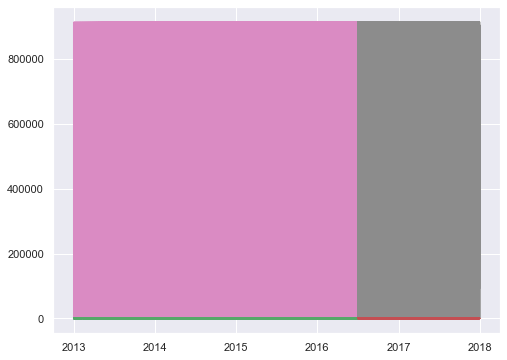

In [28]:
for col in cols:
    plt.plot(train.index, train[col])
    plt.plot(test.index, test[col])

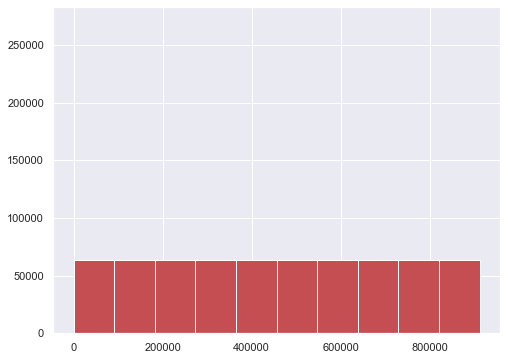

In [34]:
for col in cols:
    g = train[col].hist()

<AxesSubplot:>

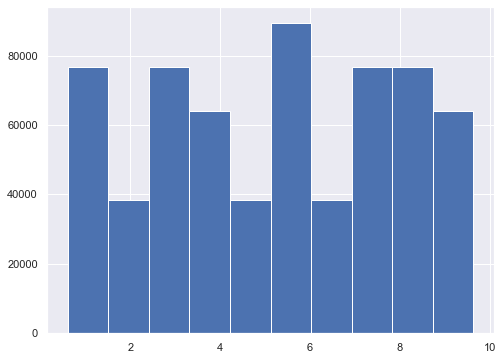

In [36]:
train.item_price.hist()

<AxesSubplot:>

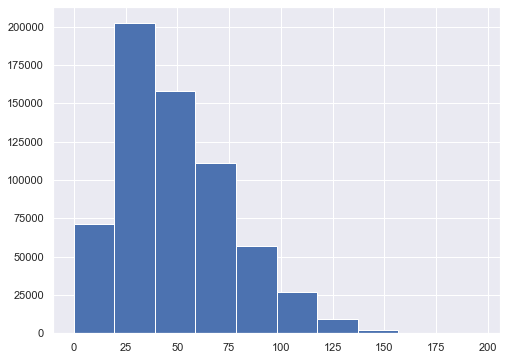

In [37]:
train.sale_amount.hist()

<AxesSubplot:>

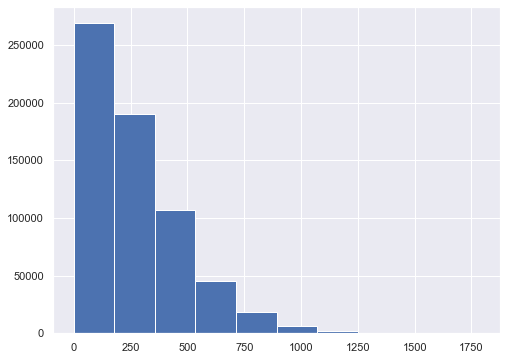

In [38]:
train.sales_total.hist()

In [39]:
train.head(2).T

sale_date,2013-01-01,2013-01-01
item_brand,Riceland,Ducal
item_id,1,17
item_name,Riceland American Jazmine Rice,Ducal Refried Red Beans
item_price,0.84,1.16
item_upc12,35200264013,88313590791
item_upc14,35200264013,88313590791
sale_amount,13.00,26.00
sale_id,1,295813
store_address,12125 Alamo Ranch Pkwy,2118 Fredericksburg Rdj
store_city,San Antonio,San Antonio


In [40]:
# create a series called 'y'

y = train.sales_total
y.head()

sale_date
2013-01-01    10.92
2013-01-01    30.16
2013-01-01   308.48
2013-01-01   197.55
2013-01-01    25.16
Name: sales_total, dtype: float64

[Text(0.5, 1.0, 'Average Total Sales by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Sales ($)')]

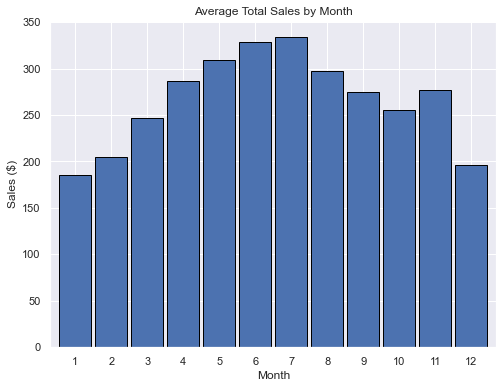

In [41]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Total Sales by Month', xlabel='Month', ylabel='Sales ($)')

[Text(0.5, 1.0, 'Average Total Sales by Weekday'),
 Text(0.5, 0, 'Weekday'),
 Text(0, 0.5, 'Sales ($)')]

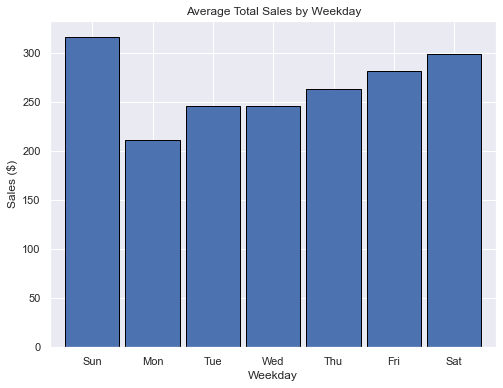

In [46]:
ax = y.groupby(y.index.strftime('%w-%a')).mean().plot.bar(width=.9, ec='black')
ax.set_xticklabels([t.get_text()[2:] for t in ax.get_xticklabels()], rotation=0)
ax.set(title='Average Total Sales by Weekday', xlabel='Weekday', ylabel='Sales ($)')

In [57]:
train.groupby('day_of_week').sales_total.describe().T

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,91500.00,91000.00,91100.00,91000.00,91500.00,91500.00,91500.00
mean,281.06,210.69,298.25,316.16,263.00,245.19,245.60
std,222.92,167.71,235.98,249.75,209.16,194.78,195.16
min,3.00,1.68,4.20,4.20,0.84,1.68,0.00
25%,100.08,74.25,106.78,112.77,93.08,87.55,87.48
50%,238.05,176.82,252.00,268.28,221.13,207.04,207.60
75%,403.88,303.48,429.66,453.60,378.16,353.40,353.44
max,1521.37,1266.29,1767.34,1785.56,1530.48,1439.38,1384.72


In [58]:
train.groupby('day_of_week').sale_amount.describe().T

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,91500.00,91000.00,91100.00,91000.00,91500.00,91500.00,91500.00
mean,52.29,39.18,55.46,58.81,48.92,45.60,45.68
std,27.79,20.95,29.29,31.01,26.04,24.27,24.33
min,2.00,1.00,3.00,3.00,1.00,2.00,0.00
25%,30.00,23.00,32.00,34.00,28.00,26.00,26.00
50%,48.00,36.00,51.00,54.00,44.00,41.00,42.00
75%,70.00,52.00,74.00,78.00,65.00,61.00,61.00
max,181.00,139.00,196.00,196.00,180.00,158.00,158.00


In [59]:
train.groupby('day_of_week').item_price.describe().T

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,91500.00,91000.00,91100.00,91000.00,91500.00,91500.00,91500.00
mean,5.16,5.16,5.16,5.16,5.16,5.16,5.16
std,2.74,2.74,2.74,2.74,2.74,2.74,2.74
min,0.60,0.60,0.60,0.60,0.60,0.60,0.60
25%,2.97,2.97,2.97,2.97,2.97,2.97,2.97
50%,5.20,5.20,5.19,5.20,5.20,5.20,5.20
75%,7.52,7.52,7.52,7.52,7.52,7.52,7.52
max,9.64,9.64,9.64,9.64,9.64,9.64,9.64


<AxesSubplot:xlabel='day_of_week', ylabel='sales_total'>

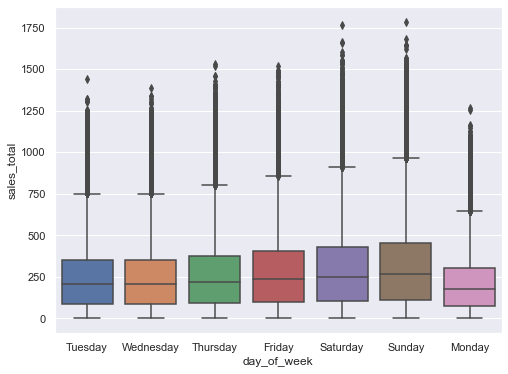

In [61]:
sns.boxplot(data = train, x = 'day_of_week', y = 'sales_total')

<AxesSubplot:xlabel='month', ylabel='sales_total'>

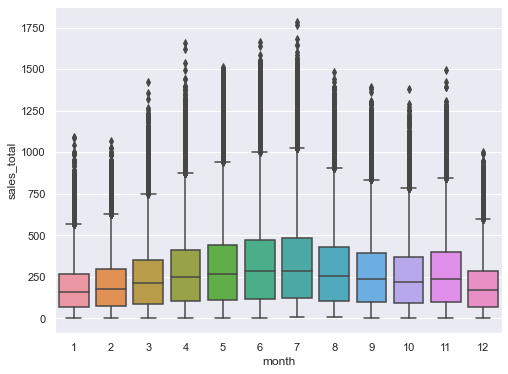

In [62]:
sns.boxplot(data = train, x = 'month', y = 'sales_total')

<AxesSubplot:xlabel='sale_date'>

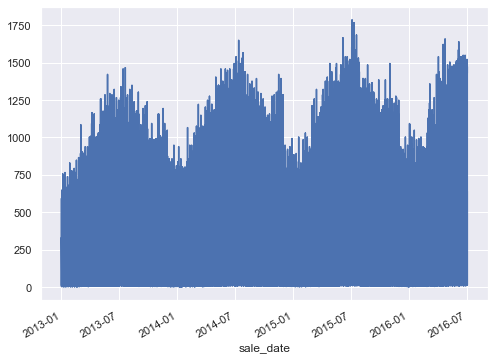

In [63]:
y.plot()

In [66]:
y.resample('D').mean()

sale_date
2013-01-01   147.69
2013-01-02   147.14
2013-01-03   156.34
2013-01-04   168.94
2013-01-05   175.24
              ...  
2016-06-28   339.43
2016-06-29   339.03
2016-06-30   363.72
2016-07-01   414.98
2016-07-02   462.80
Freq: D, Name: sales_total, Length: 1279, dtype: float64

<AxesSubplot:title={'center':'Daily Total Sales average'}, xlabel='sale_date'>

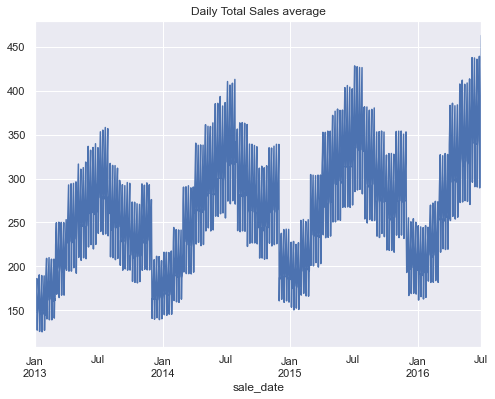

In [67]:
y.resample('D').mean().plot(title='Daily Total Sales average')

<AxesSubplot:title={'center':'2 Week Total Sales average'}, xlabel='sale_date'>

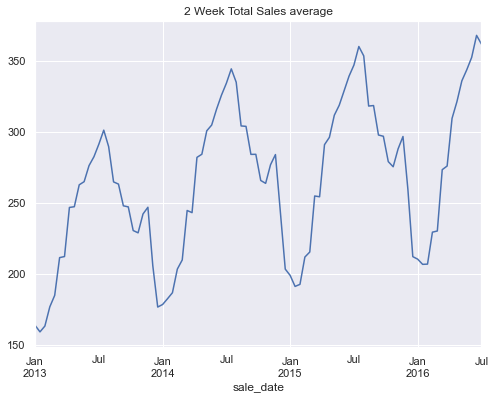

In [68]:
y.resample('2W').mean().plot(title='2 Week Total Sales average')

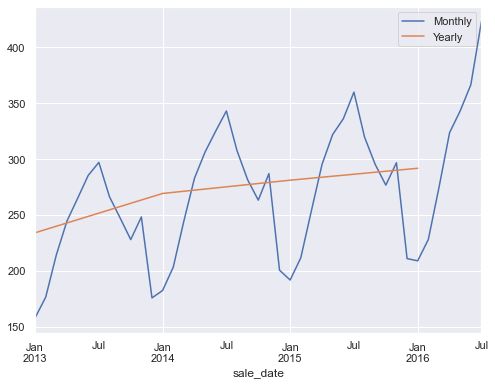

In [69]:
y.resample('M').mean().plot(label = 'Monthly')
y.resample('Y').mean().plot(label = 'Yearly')
plt.legend()

<AxesSubplot:xlabel='sale_date'>

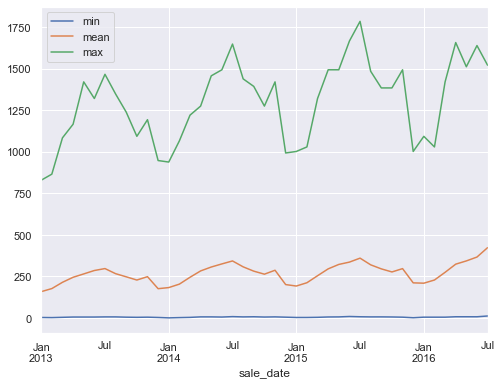

In [70]:
y.resample('M').agg(['min', 'mean', 'max']).plot()

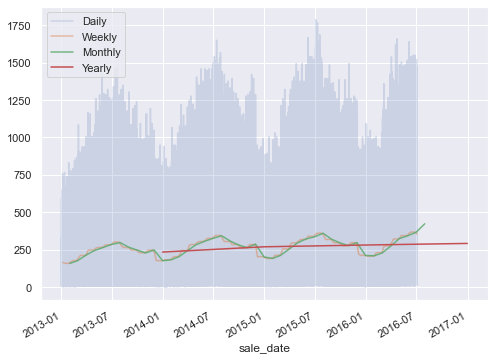

In [71]:
y.plot(alpha=.2, label='Daily')
y.resample('W').mean().plot(alpha=.5, label='Weekly')
y.resample('M').mean().plot(alpha=.8, label='Monthly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

<AxesSubplot:title={'center':'Average week-to-week change in total sales'}, xlabel='sale_date'>

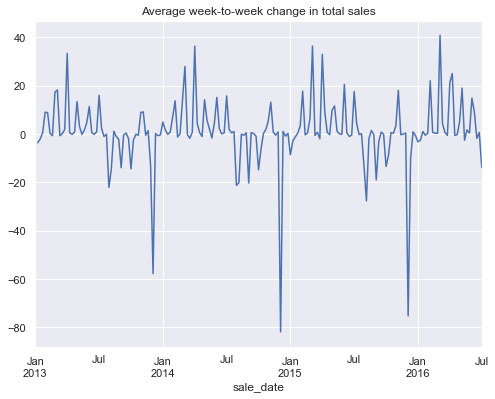

In [72]:
# weekly variance is highest in 
y.resample('W').mean().diff().plot(title='Average week-to-week change in total sales')

<AxesSubplot:title={'center':'Average month-to-month change in total sales'}, xlabel='sale_date'>

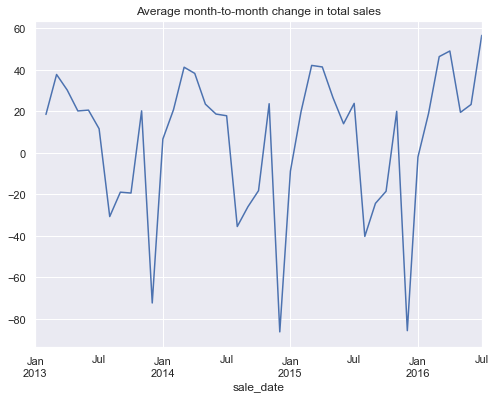

In [73]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in total sales')

In [74]:
y.groupby([y.index.year, y.index.month]).mean()

sale_date  sale_date
2013       1           157.89
           2           176.41
           3           214.18
           4           244.46
           5           264.66
           6           285.26
           7           296.88
           8           266.18
           9           247.24
           10          227.87
           11          248.11
           12          175.75
2014       1           182.41
           2           203.21
           3           244.49
           4           282.79
           5           306.27
           6           324.97
           7           342.85
           8           307.35
           9           281.35
           10          263.13
           11          286.82
           12          200.54
2015       1           191.73
           2           211.59
           3           253.74
           4           295.15
           5           321.81
           6           335.85
           7           359.70
           8           319.44
           9       

In [75]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0)

sale_date,2013,2014,2015,2016
sale_date,,,,
1,157.89,182.41,191.73,208.90
2,176.41,203.21,211.59,227.98
3,214.18,244.49,253.74,274.37
4,244.46,282.79,295.15,323.46
5,264.66,306.27,321.81,342.99
6,285.26,324.97,335.85,366.32
7,296.88,342.85,359.70,422.95
8,266.18,307.35,319.44,nan
9,247.24,281.35,295.09,nan


<AxesSubplot:title={'center':'Average Monthly Sales by Year'}, xlabel='sale_date'>

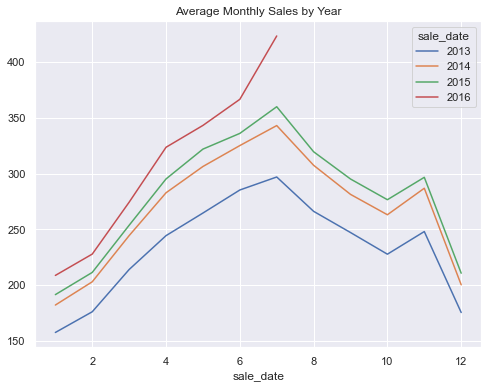

In [76]:
# unstack is similar to pivot_table. It turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title="Average Monthly Sales by Year")

In [77]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

sale_date,1,2,3,4,5,6,7,8,9,10,11,12
sale_date,,,,,,,,,,,,
2013,157.89,176.41,214.18,244.46,264.66,285.26,296.88,266.18,247.24,227.87,248.11,175.75
2014,182.41,203.21,244.49,282.79,306.27,324.97,342.85,307.35,281.35,263.13,286.82,200.54
2015,191.73,211.59,253.74,295.15,321.81,335.85,359.70,319.44,295.09,276.57,296.58,210.89
2016,208.90,227.98,274.37,323.46,342.99,366.32,422.95,nan,nan,nan,nan,nan


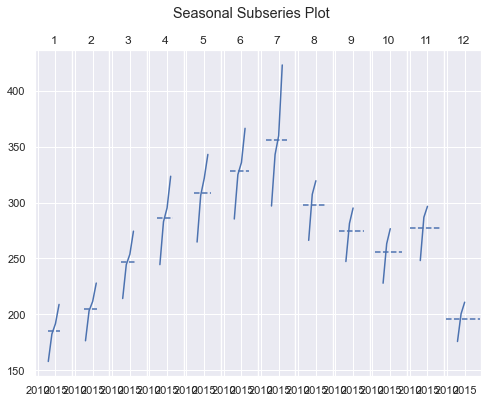

In [78]:
#make 12 subplot and share axis
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)

#gets 1st axis and 1st column of table
for ax, (month, subset) in zip(axs, table.iteritems()):
    
    #plot
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

Text(0.5, 1.0, 'Lag plot with lag = 1')

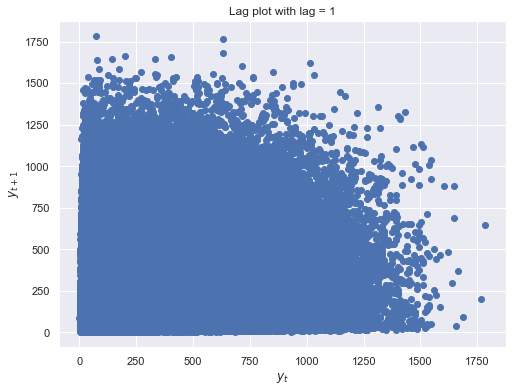

In [79]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y_t$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag = 1')

In [83]:
daily = train.resample('D').mean()
daily['tsales_next_day'] = daily.sales_total.shift(-1)

In [85]:
daily

,item_id,item_price,sale_amount,sale_id,store_id,month,sales_total,tsales_next_day
sale_date,,,,,,,,
2013-01-01,25.50,5.16,27.39,455588.00,5.50,1.00,147.69,147.14
2013-01-02,25.50,5.16,27.36,455589.00,5.50,1.00,147.14,156.34
2013-01-03,25.50,5.16,28.98,455590.00,5.50,1.00,156.34,168.94
2013-01-04,25.50,5.16,31.35,455591.00,5.50,1.00,168.94,175.24
2013-01-05,25.50,5.16,32.47,455592.00,5.50,1.00,175.24,186.19
...,...,...,...,...,...,...,...,...
2016-06-28,25.50,5.16,63.08,456862.00,5.50,6.00,339.43,339.03
2016-06-29,25.50,5.16,63.28,456863.00,5.50,6.00,339.03,363.72
2016-06-30,25.50,5.16,67.66,456864.00,5.50,6.00,363.72,414.98


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='sales_total', ylabel='tsales_next_day'>

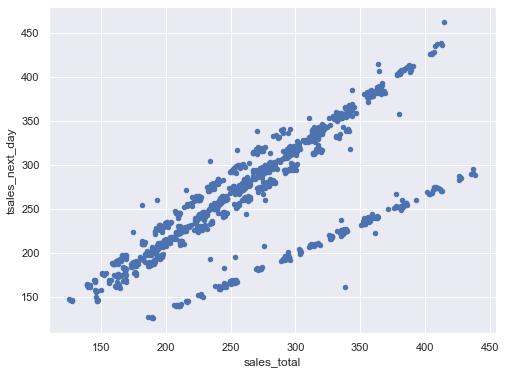

In [84]:
daily.plot.scatter(x='sales_total', y='tsales_next_day')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


,item_id,item_price,sale_amount,sale_id,store_id,month,this_week,1_week_out
sale_date,,,,,,,,
2013-01-06,25.50,5.16,30.36,455590.50,5.50,1.00,163.59,159.98
2013-01-13,25.50,5.16,29.69,455597.00,5.50,1.00,159.98,157.95
2013-01-20,25.50,5.16,29.41,455604.00,5.50,1.00,157.95,158.55
2013-01-27,25.50,5.16,29.51,455611.00,5.50,1.00,158.55,167.59
2013-02-03,25.50,5.16,31.15,455618.00,5.50,1.43,167.59,176.46
...,...,...,...,...,...,...,...,...
2016-06-05,25.50,5.16,67.03,456836.00,5.50,5.71,359.76,368.76
2016-06-12,25.50,5.16,68.51,456843.00,5.50,6.00,368.76,366.95
2016-06-19,25.50,5.16,68.26,456850.00,5.50,6.00,366.95,367.59


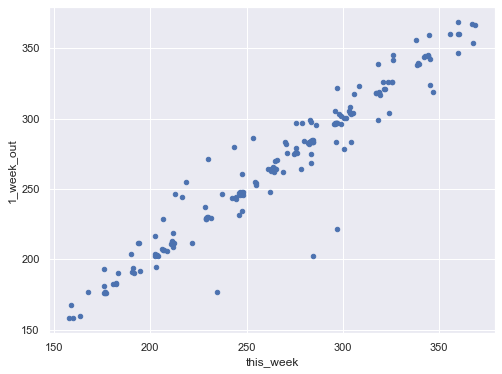

In [88]:
weekly = train.resample('W').mean()
weekly['1_week_out'] = weekly.sales_total.shift(-1)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='1_week_out')
weekly

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


,item_id,item_price,sale_amount,sale_id,store_id,month,this_week,12_weeks_out
sale_date,,,,,,,,
2013-01-06,25.50,5.16,30.36,455590.50,5.50,1.00,163.59,213.00
2013-01-13,25.50,5.16,29.69,455597.00,5.50,1.00,159.98,246.39
2013-01-20,25.50,5.16,29.41,455604.00,5.50,1.00,157.95,246.86
2013-01-27,25.50,5.16,29.51,455611.00,5.50,1.00,158.55,246.69
2013-02-03,25.50,5.16,31.15,455618.00,5.50,1.43,167.59,247.58
...,...,...,...,...,...,...,...,...
2016-06-05,25.50,5.16,67.03,456836.00,5.50,5.71,359.76,nan
2016-06-12,25.50,5.16,68.51,456843.00,5.50,6.00,368.76,nan
2016-06-19,25.50,5.16,68.26,456850.00,5.50,6.00,366.95,nan


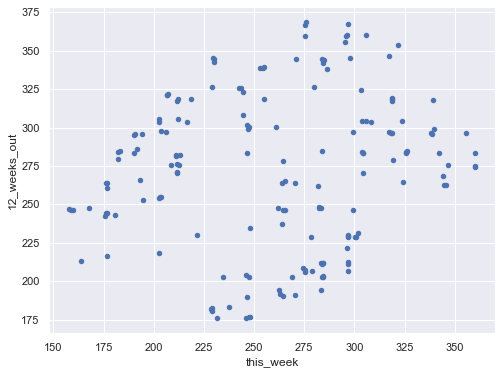

In [89]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.sales_total.shift(-12)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


,item_id,item_price,sale_amount,sale_id,store_id,month,this_week,26_weeks_out
sale_date,,,,,,,,
2013-01-06,25.50,5.16,30.36,455590.50,5.50,1.00,163.59,299.21
2013-01-13,25.50,5.16,29.69,455597.00,5.50,1.00,159.98,301.58
2013-01-20,25.50,5.16,29.41,455604.00,5.50,1.00,157.95,300.57
2013-01-27,25.50,5.16,29.51,455611.00,5.50,1.00,158.55,300.48
2013-02-03,25.50,5.16,31.15,455618.00,5.50,1.43,167.59,278.38
...,...,...,...,...,...,...,...,...
2016-06-05,25.50,5.16,67.03,456836.00,5.50,5.71,359.76,nan
2016-06-12,25.50,5.16,68.51,456843.00,5.50,6.00,368.76,nan
2016-06-19,25.50,5.16,68.26,456850.00,5.50,6.00,366.95,nan


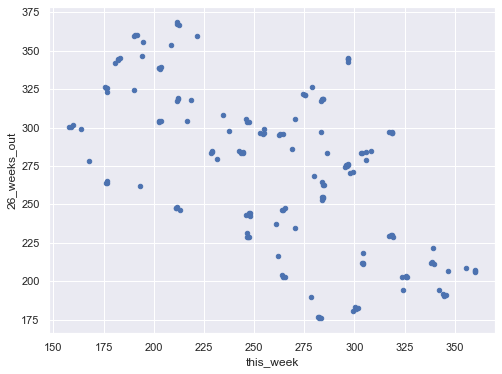

In [90]:
weekly = train.resample('W').mean()
weekly['26_weeks_out'] = weekly.sales_total.shift(-26)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='26_weeks_out')
weekly

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 26)'>

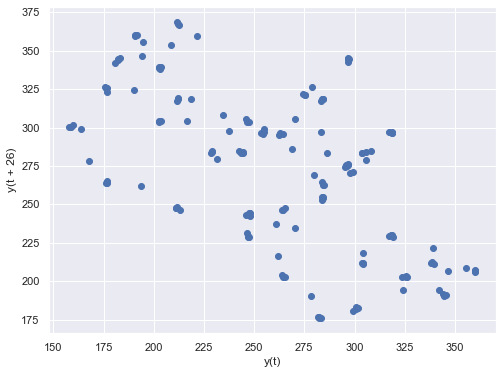

In [92]:
pd.plotting.lag_plot(train.sales_total.resample('W').mean(), lag=26)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 52)'>

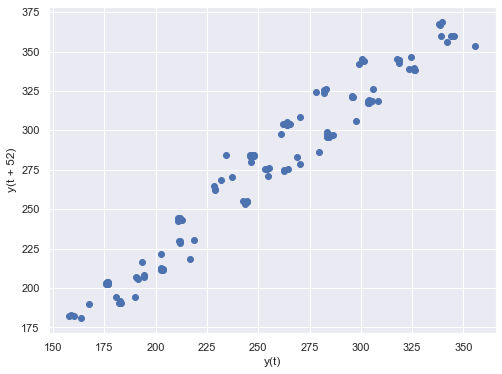

In [93]:
pd.plotting.lag_plot(train.sales_total.resample('W').mean(), lag=52)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

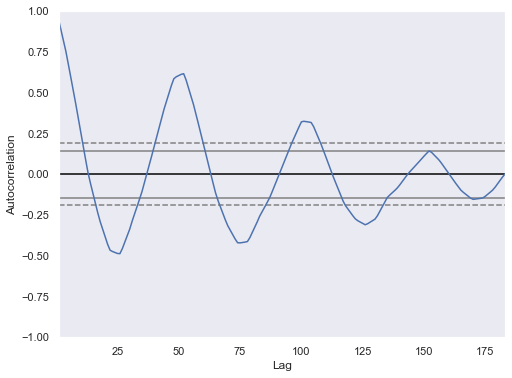

In [94]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

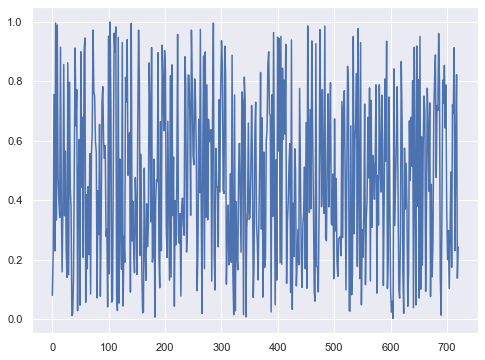

In [96]:
grid = np.linspace(0, 720, 500)
noise = np.random.rand(500)
# result_curve =  noise
plt.plot(grid, noise)

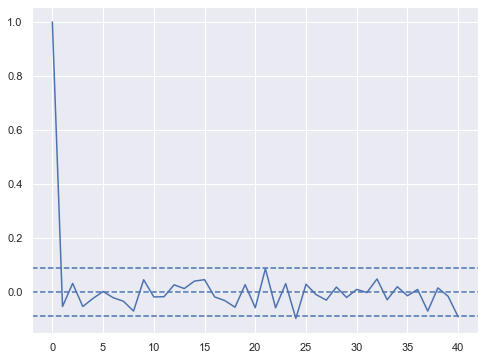

In [97]:
from statsmodels.tsa import stattools

acf_result = stattools.acf(noise)
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(noise)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(noise)),linestyle='--')

In [99]:
import statsmodels.api as sm

In [100]:
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
result

In [101]:
result.seasonal

sale_date
2013-01-06   -77.82
2013-01-13   -76.42
2013-01-20   -77.66
2013-01-27   -77.65
2013-02-03   -73.08
              ...  
2016-06-05    57.30
2016-06-12    58.30
2016-06-19    57.47
2016-06-26    57.14
2016-07-03    70.61
Freq: W-SUN, Name: seasonal, Length: 183, dtype: float64

In [102]:
# Make a dataframe:

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06,163.59,nan,-77.82,nan
2013-01-13,159.98,nan,-76.42,nan
2013-01-20,157.95,nan,-77.66,nan
2013-01-27,158.55,nan,-77.65,nan
2013-02-03,167.59,nan,-73.08,nan


<AxesSubplot:xlabel='sale_date'>

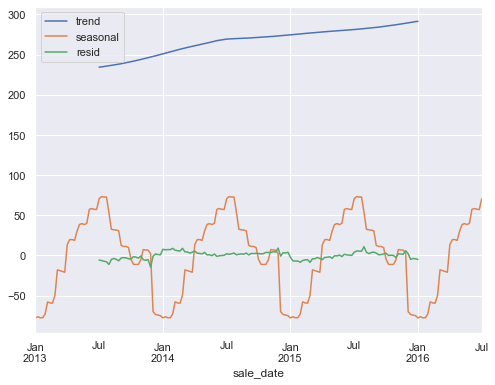

In [103]:
decomposition.iloc[:, 1:].plot()

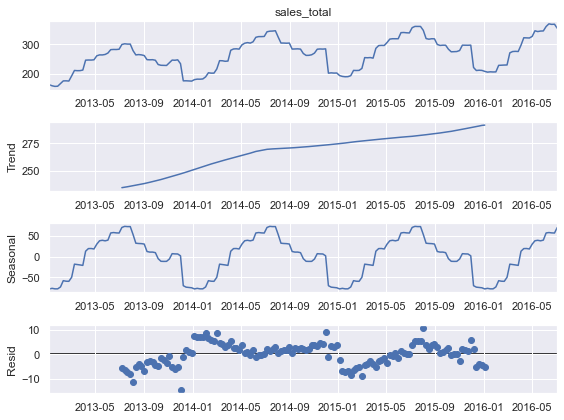

In [104]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

___


In [4]:
opsd = a.get_opsd()

In [5]:
opsd = p.prep_opsd(opsd)